In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-dataset/zomato.csv


# Importing Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

# Importing Dataset

In [3]:
data = pd.read_csv('/kaggle/input/zomato-restaurants-dataset/zomato.csv',encoding = 'unicode_escape')

# Sanity Check of Dataset

In [4]:
data.shape

(7105, 12)

In [5]:
data.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [7]:
# Let's delete first 2 irrelevant columns from the Data
del data['Unnamed: 0.1']
del data['Unnamed: 0']

In [8]:
# Checking for null values
data.isnull().sum()

restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [9]:
# Filling the two columns 'rate (out of 5)' and 'avg cost (two people)'
for i in data.select_dtypes(include = 'float64').columns:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [10]:
# Checking for duplicate values
data.duplicated().sum()

0

# Exploratoty Data Analysis

In [11]:
# descriptive statistics
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
restaurant name,7105,7105,#FeelTheROLL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant type,7105,81,Quick Bites,2840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate (out of 5),7105.0,NaN,NaN,NaN,3.507417,0.466242,1.8,3.2,3.5,3.8,4.9
num of ratings,7105.0,NaN,NaN,NaN,188.921042,592.171049,1.0,16.0,40.0,128.0,16345.0
avg cost (two people),7105.0,NaN,NaN,NaN,538.358761,461.539596,40.0,300.0,400.0,600.0,6000.0
online_order,7105,2,Yes,3727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table booking,7105,2,No,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisines type,7105,2175,"North Indian, Chinese",421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,7105,30,"Byresandra,Tavarekere,Madiwala",798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local address,7105,90,Whitefield,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.columns

Index(['restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'area', 'local address'],
      dtype='object')

# Histogram to understand the Distribution

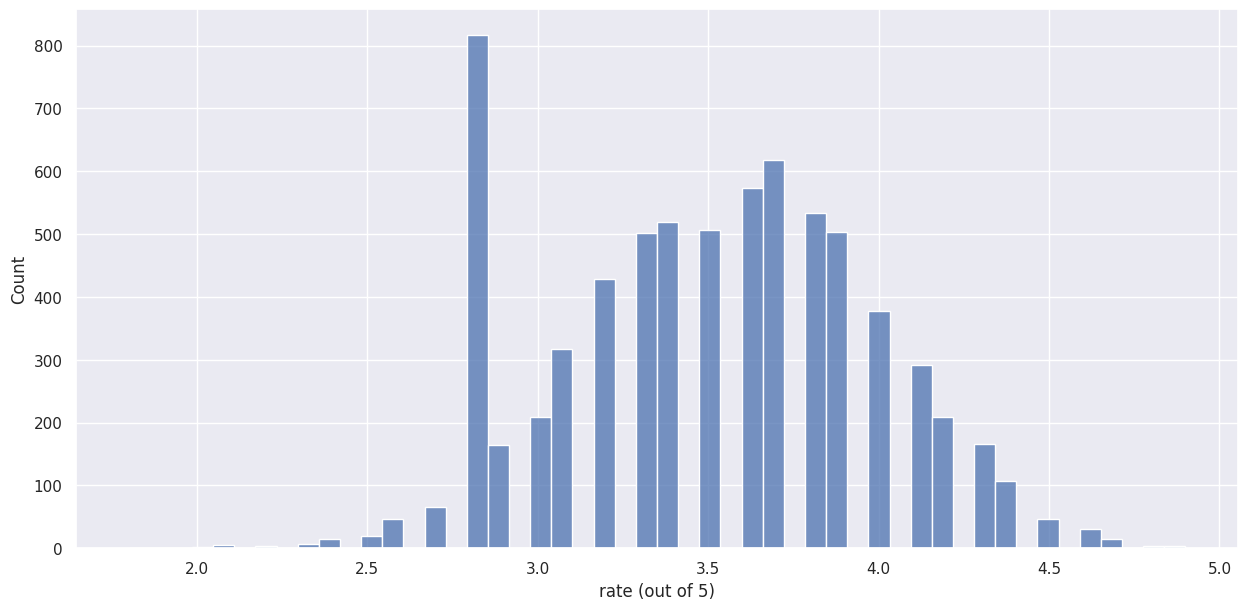

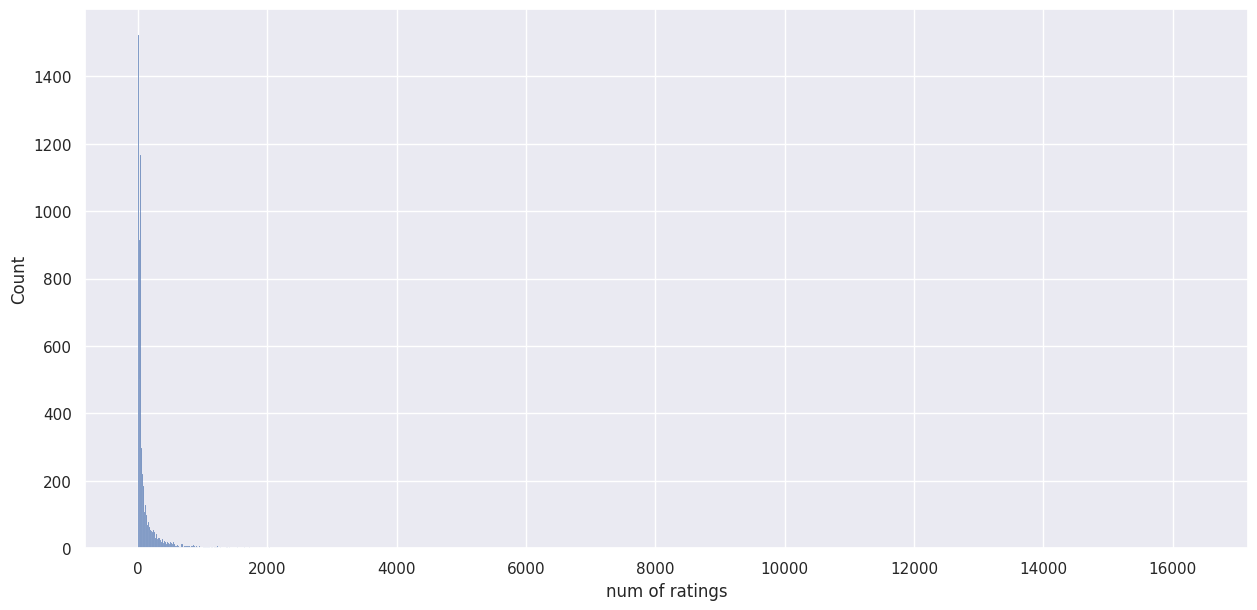

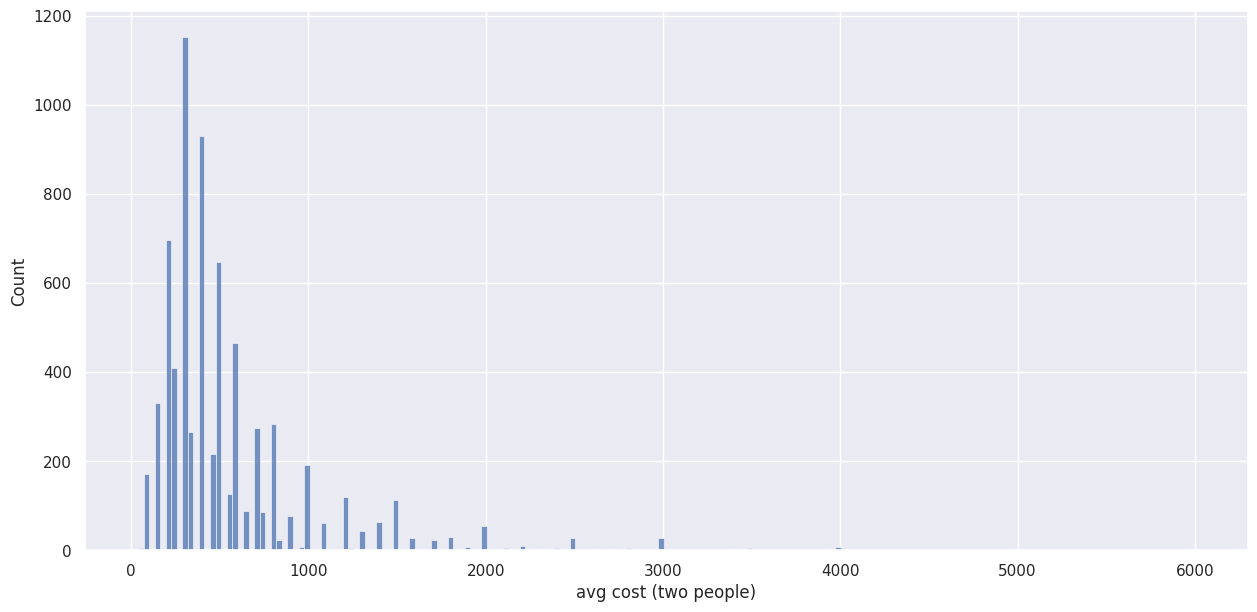

In [13]:
sns.set(rc = {'figure.figsize':((15,7))})
for i in data.select_dtypes(include = 'number').columns:
    sns.histplot(data = data, x = i)
    plt.show()

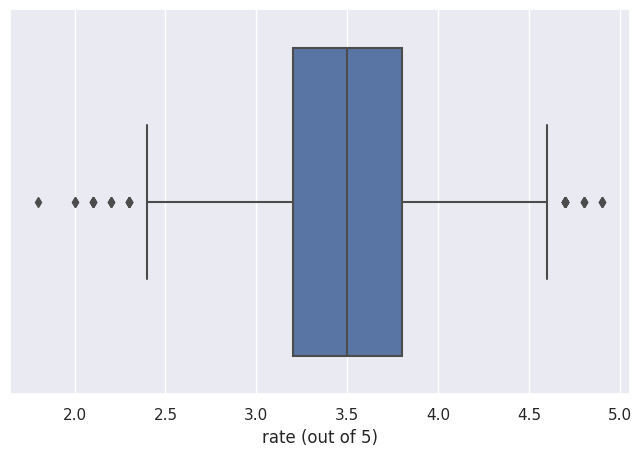

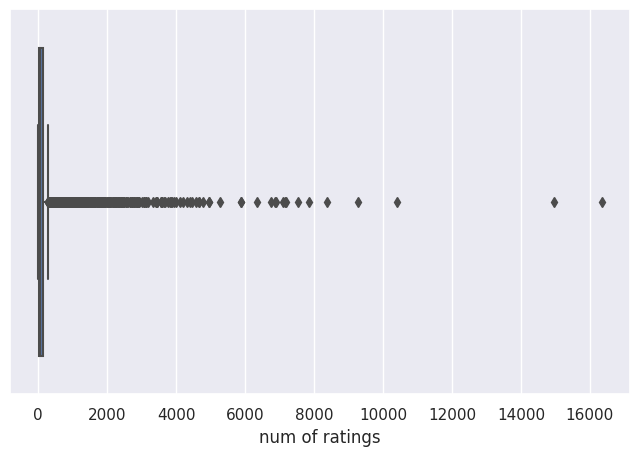

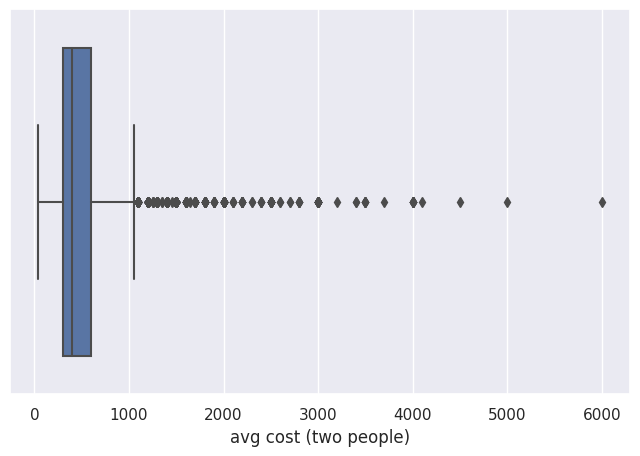

In [14]:
# Boxplot to understand outliers
sns.set(rc = {'figure.figsize':(8,5)})
for i in data.select_dtypes(include = "number"):
    sns.boxplot(data = data, x = i)
    plt.show()

# Distribution by Restaurant Types

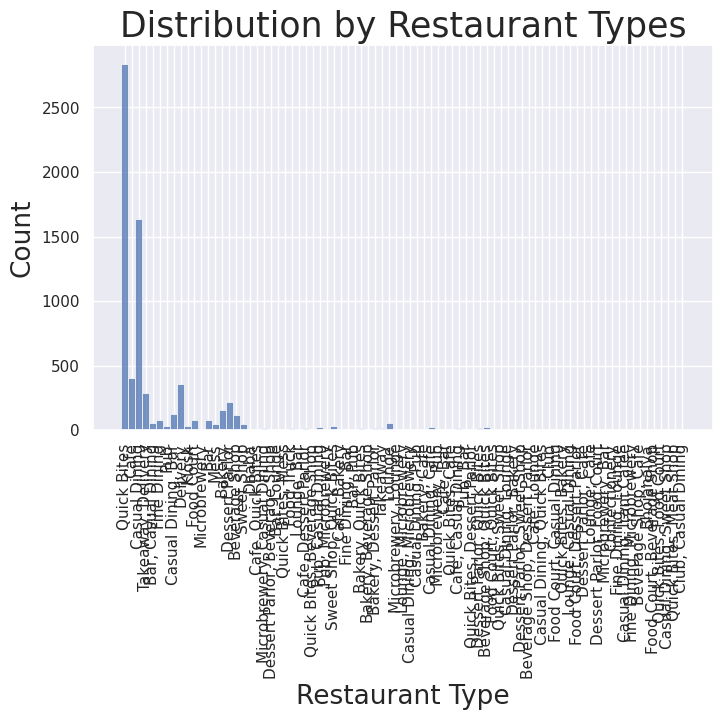

In [15]:
sns.histplot(x = 'restaurant type', data = data)
plt.title("Distribution by Restaurant Types", fontsize = 25)
plt.xlabel("Restaurant Type",fontsize = 19)
plt.ylabel("Count", fontsize = 19)
plt.xticks(rotation = 90)
plt.show()

# Distribution by Cuisine Types

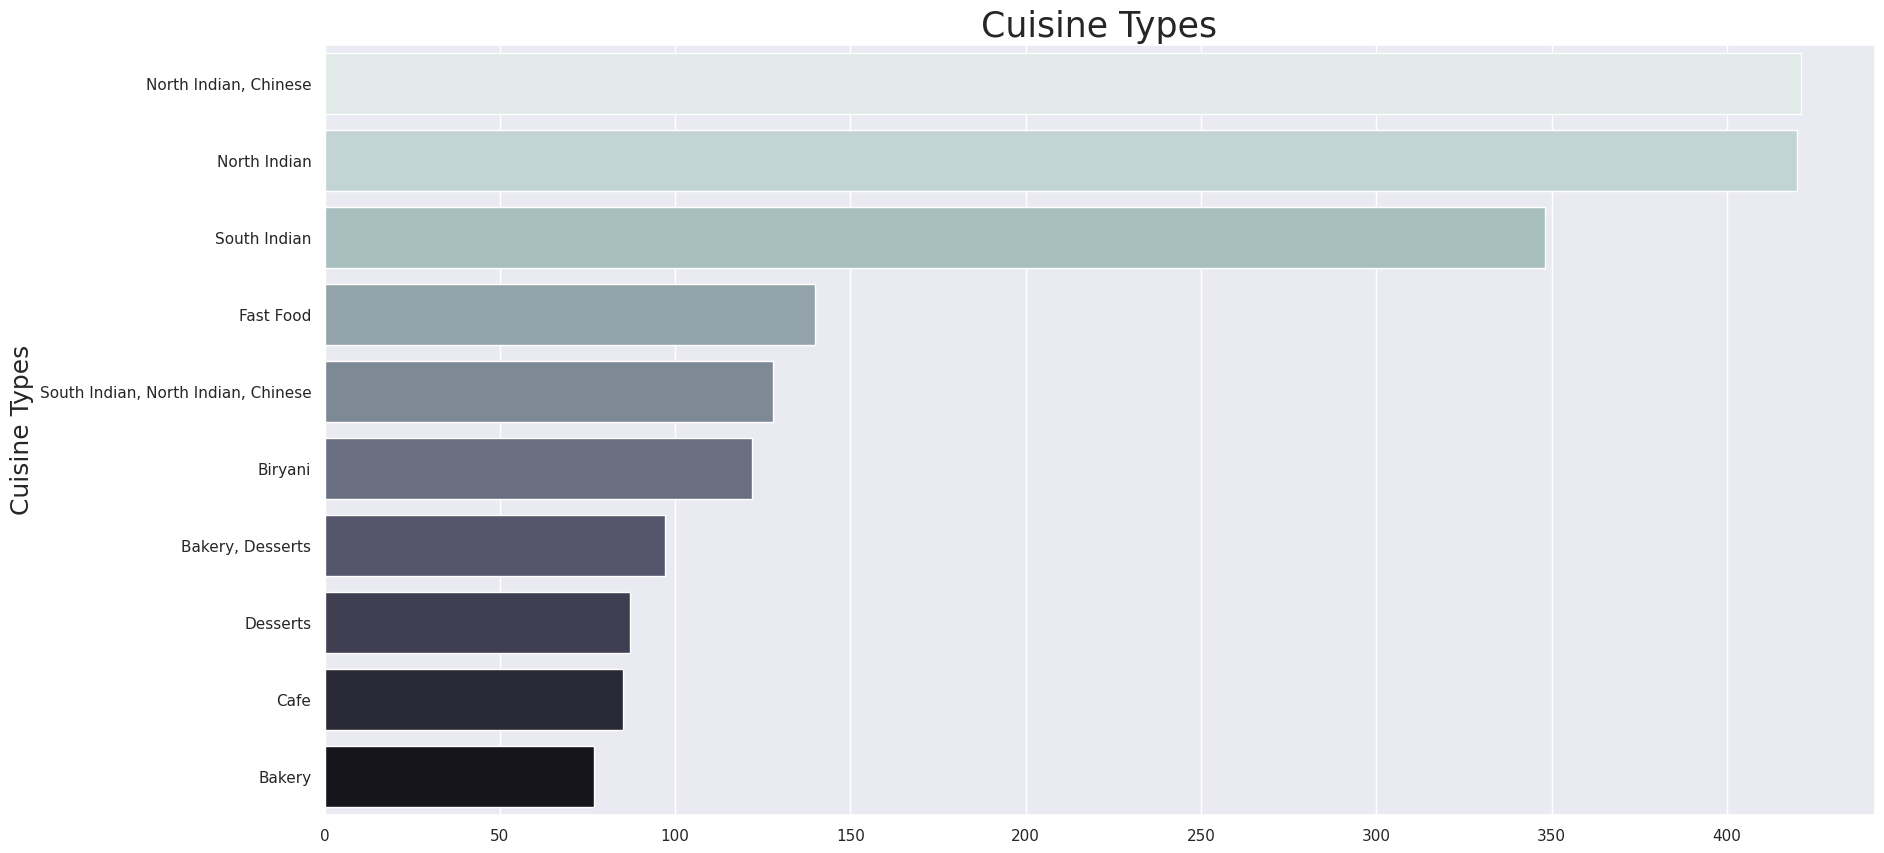

In [16]:
sns.set(rc = {'figure.figsize':(20,10)})
Cuisines_Type = data['cuisines type'].value_counts().head(10)
sns.barplot(x = Cuisines_Type.values, y = Cuisines_Type.index, palette = 'bone_r')
plt.title("Cuisine Types", fontsize = 25)
plt.ylabel("Cuisine Types",fontsize = 18)
plt.show()

# Top 10 Restaurants by Ratings

                                        restaurant name  rate (out of 5)
466                      Asia Kitchen By Mainland China              4.9
1034                        Byg Brewski Brewing Company              4.9
5304  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...              4.9
687                              Belgian Waffle Factory              4.8
4436                                 O.G. Variar & Sons              4.8
6495                                   The Pizza Bakery              4.8
4819                                       Punjab Grill              4.8
7032                                            You Mee              4.7
1955                                 ECHOES Koramangala              4.7
1021                                        Burma Burma              4.7


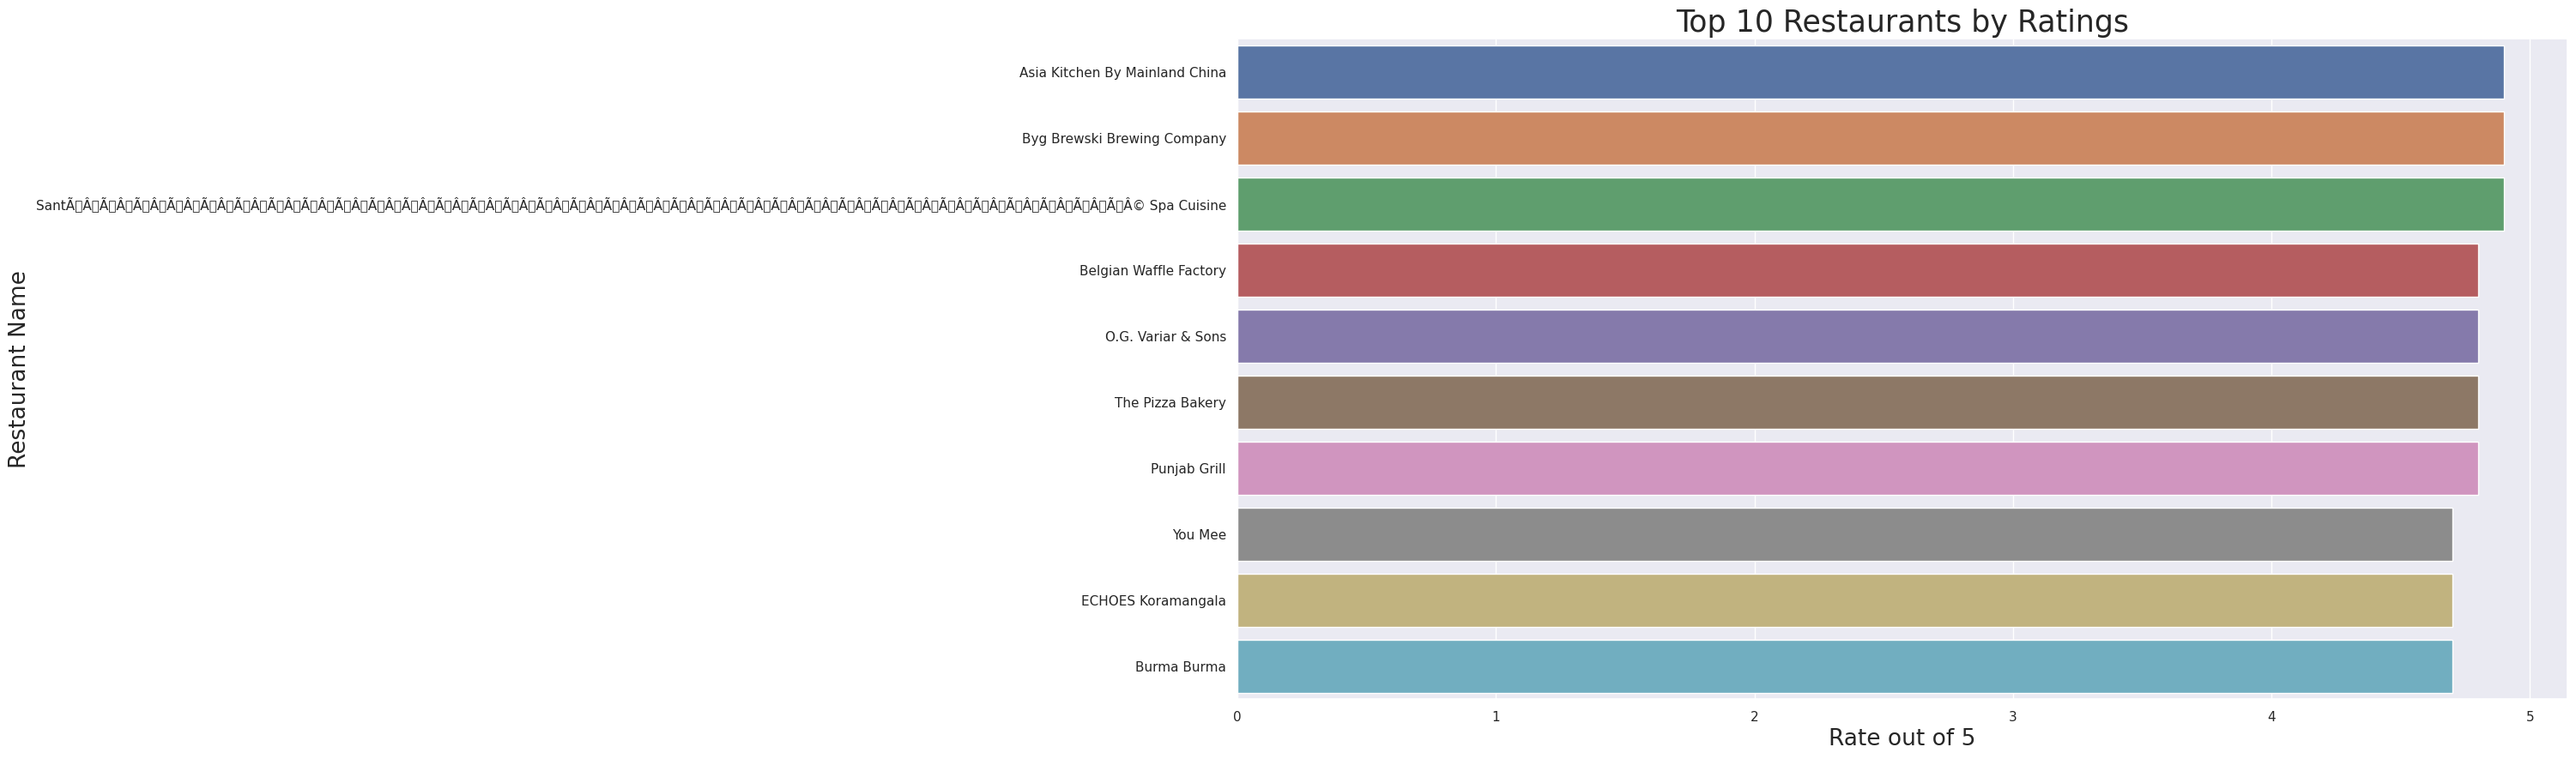

In [17]:
sns.set(rc = {'figure.figsize':(20,10)})
top = data.groupby(['restaurant name'], as_index = False)['rate (out of 5)'].sum().sort_values(by = 'rate (out of 5)', ascending = False).head(10)
sns.barplot(data = top, y = 'restaurant name', x = 'rate (out of 5)')
print(top)
plt.title("Top 10 Restaurants by Ratings", fontsize = 25)
plt.xlabel("Rate out of 5",fontsize = 19)
plt.ylabel("Restaurant Name", fontsize = 19)
plt.show()

# Ratings by Restaurant Types

                                        restaurant name  rate (out of 5)
466                      Asia Kitchen By Mainland China              4.9
1034                        Byg Brewski Brewing Company              4.9
5304  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...              4.9
687                              Belgian Waffle Factory              4.8
4436                                 O.G. Variar & Sons              4.8
6495                                   The Pizza Bakery              4.8
4819                                       Punjab Grill              4.8
7032                                            You Mee              4.7
1955                                 ECHOES Koramangala              4.7
1021                                        Burma Burma              4.7


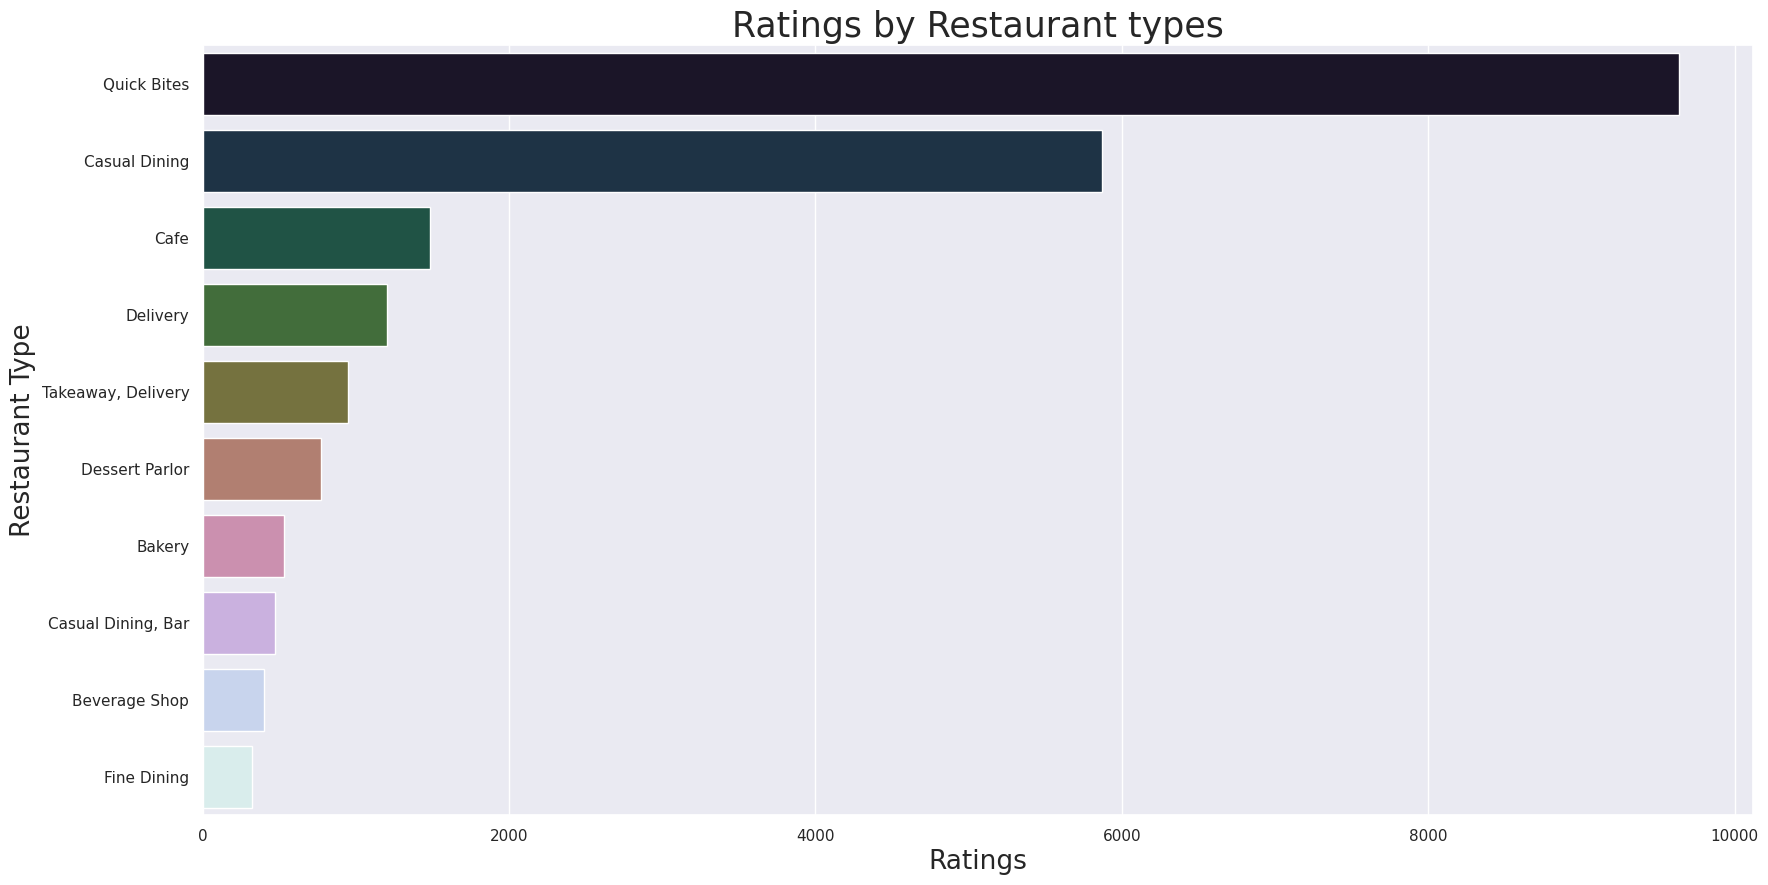

In [18]:
sns.set(rc = {'figure.figsize':(20,10)})
rating_types = data.groupby(['restaurant type'], as_index = False)['rate (out of 5)'].sum().sort_values(by = 'rate (out of 5)', ascending = False).head(10)
sns.barplot(data = rating_types, y = 'restaurant type', x = 'rate (out of 5)', palette = 'cubehelix')
print(top)
plt.title("Ratings by Restaurant types", fontsize = 25)
plt.xlabel("Ratings",fontsize = 19)
plt.ylabel("Restaurant Type", fontsize = 19)
plt.show()

# Top 10 Cuisines by Ratings

                                        restaurant name  rate (out of 5)
466                      Asia Kitchen By Mainland China              4.9
1034                        Byg Brewski Brewing Company              4.9
5304  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...              4.9
687                              Belgian Waffle Factory              4.8
4436                                 O.G. Variar & Sons              4.8
6495                                   The Pizza Bakery              4.8
4819                                       Punjab Grill              4.8
7032                                            You Mee              4.7
1955                                 ECHOES Koramangala              4.7
1021                                        Burma Burma              4.7


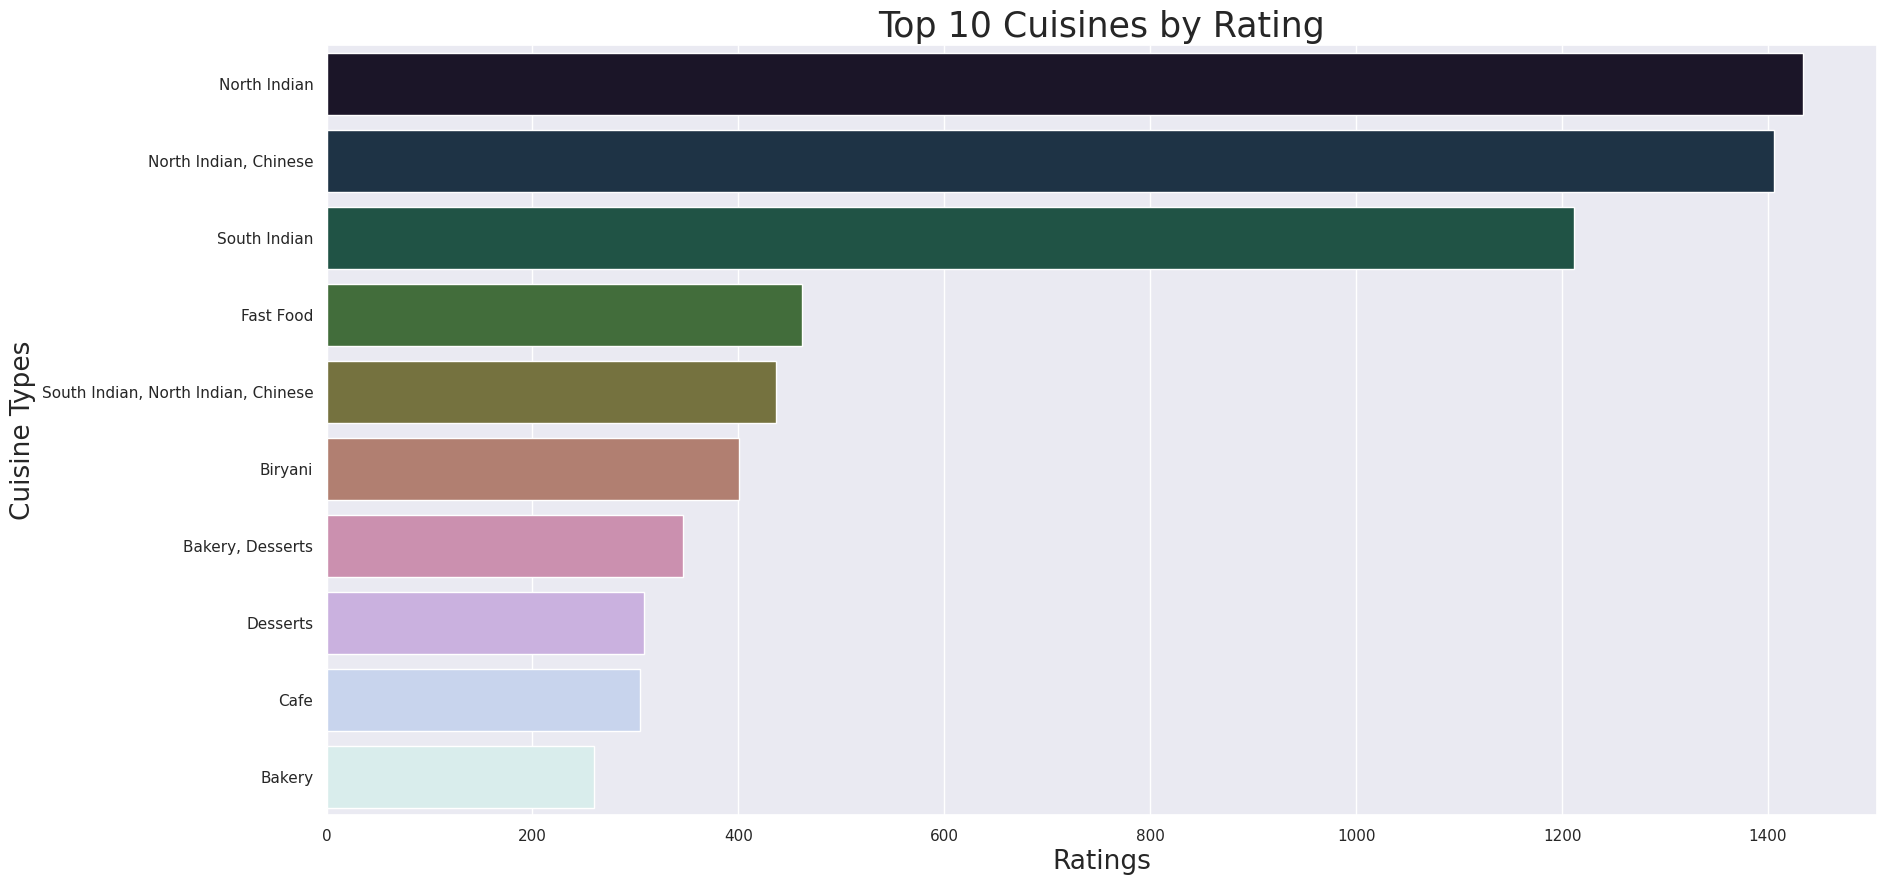

In [19]:

sns.set(rc = {'figure.figsize':(20,10)})
top_cuisine_types = data.groupby(['cuisines type'], as_index = False)['rate (out of 5)'].sum().sort_values(by = 'rate (out of 5)', ascending = False).head(10)
sns.barplot(data = top_cuisine_types, y = 'cuisines type', x = 'rate (out of 5)', palette = 'cubehelix')
print(top)
plt.title("Top 10 Cuisines by Rating", fontsize = 25)
plt.xlabel("Ratings",fontsize = 19)
plt.ylabel("Cuisine Types", fontsize = 19)
plt.show()

# Online Order Counts

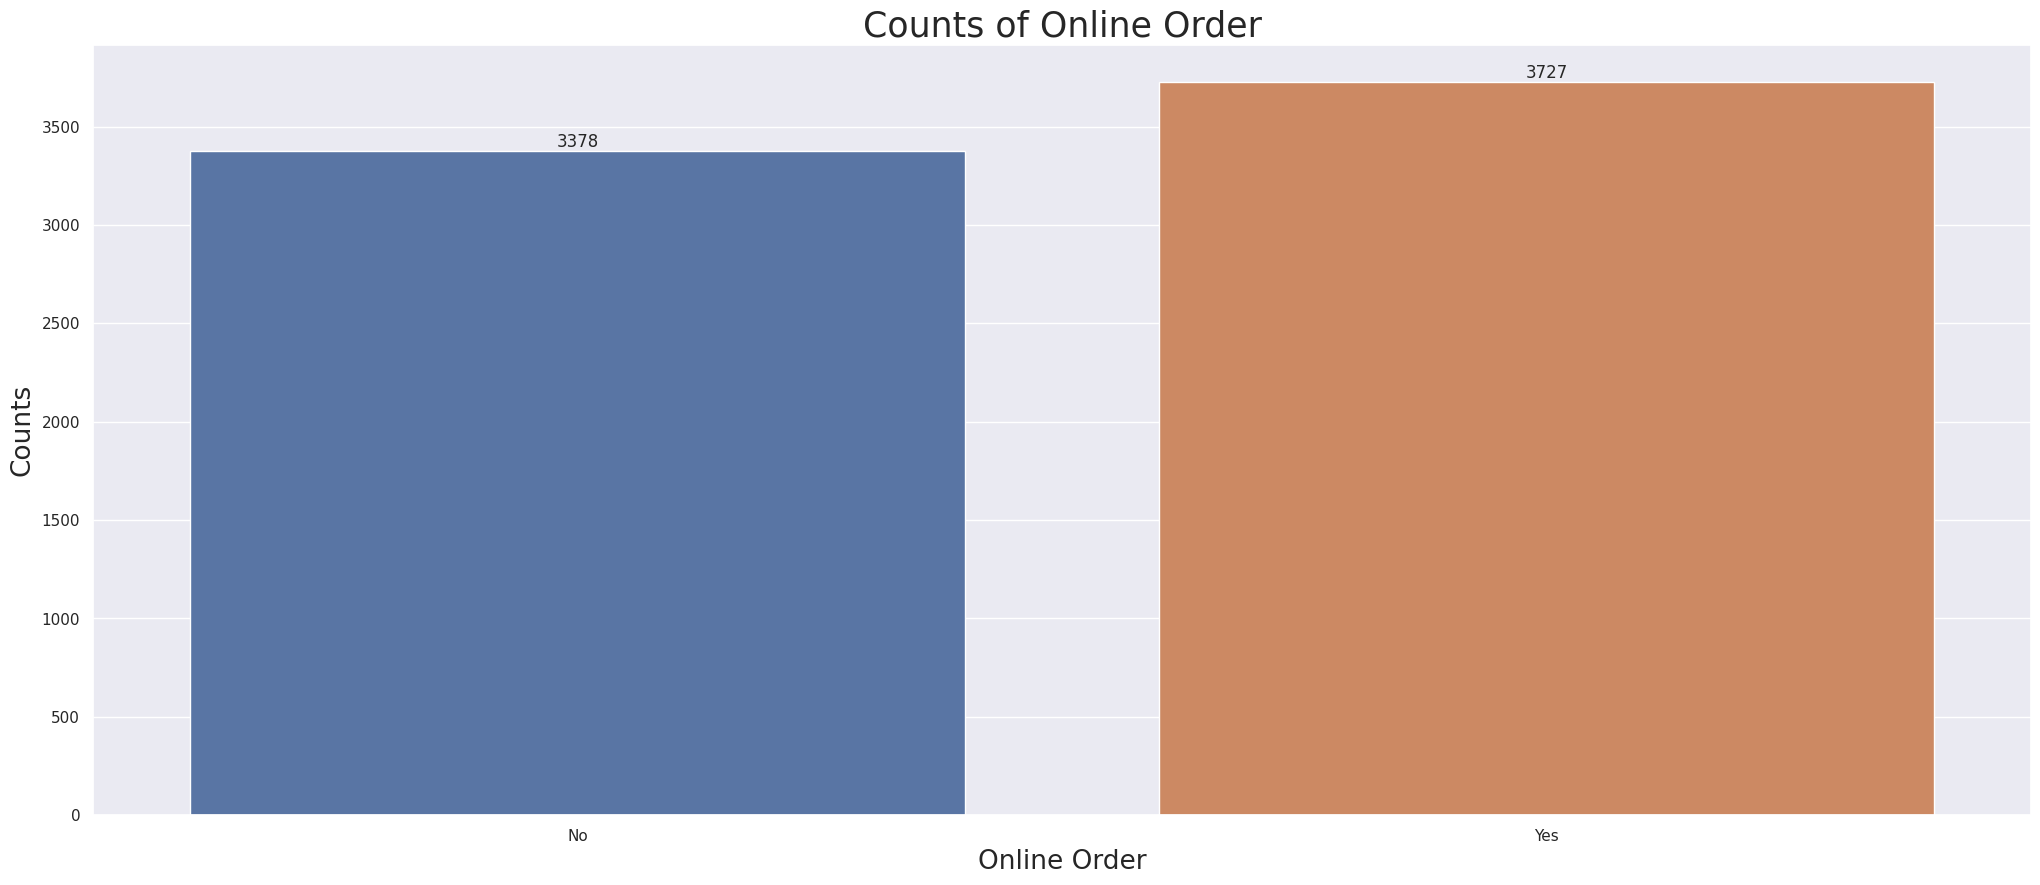

In [20]:
sns.set(rc = {'figure.figsize':(25,10)})
ax = sns.countplot(x = 'online_order', data = data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Counts of Online Order", fontsize = 25)
plt.xlabel("Online Order",fontsize = 19)
plt.ylabel("Counts", fontsize = 19)
plt.show()

# Table Booking Count

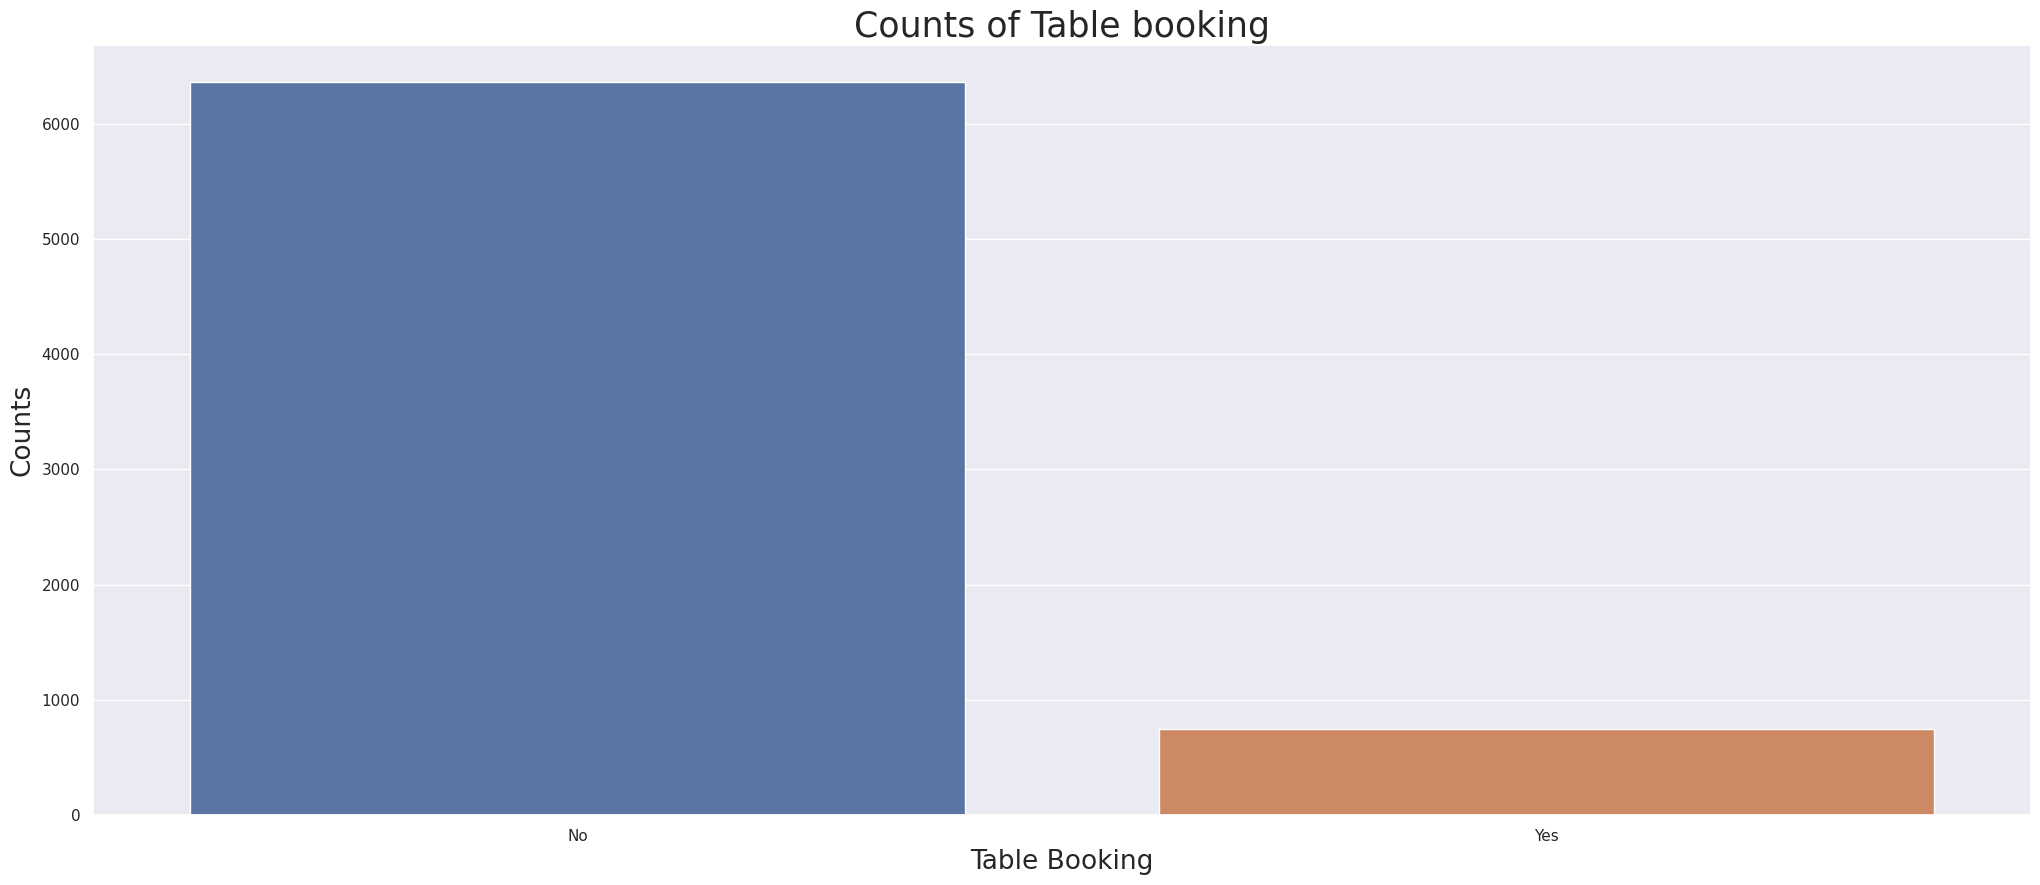

In [21]:
sns.countplot(x = 'table booking', data = data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Counts of Table booking", fontsize = 25)
plt.xlabel("Table Booking",fontsize = 19)
plt.ylabel("Counts", fontsize = 19)
plt.show()

# Heatmap for Correlation

<Axes: >

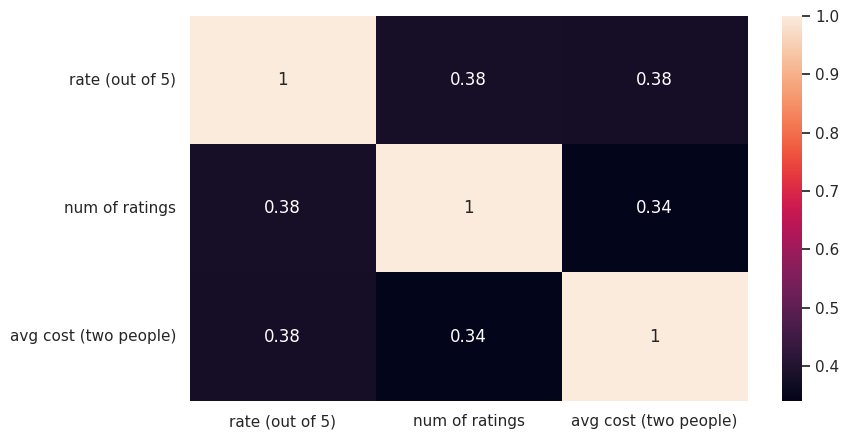

In [22]:
sns.set(rc = {'figure.figsize':(9,5)})
s = data.select_dtypes(include = "number").corr()
sns.heatmap(s, annot = True)